<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/Projects/Dogs%26Cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
# kaggle  ="/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/Project/kaggle.json"

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/Project/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# generator -> it is useful in large dataset. It divides all the in small small batches. 
#              It work on RAM level. It is way to create iterator.

## Python Generator

In [7]:
def gen_demo(): # this is the simple function 
# In this it return generator object.
  yield "first statement"
  yield "second statement"
  yield "third statement"
# In normal function return statment but in generator thier is yield statment.

In [8]:
gen = gen_demo()
print(gen)
print(next(gen))
print(next(gen))
print(next(gen))

<generator object gen_demo at 0x7fefbf4bd7e0>
first statement
second statement
third statement


### Chaining Generators  

In [9]:
def fibonacci_numebrs(nums):
  x,y=0,1
  for _ in range(nums):
    x,y = y,x+y 
    yield x
def square(nums):
  for num in nums:
    yield num**2    

In [10]:
gen=fibonacci_numebrs(10)
print(sum(square((gen))))

4895


# Create Generators

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = 'inferred',
    
    label_mode = 'int', 
    batch_size= 32,
    image_size=(256,256)  # CNN model assume all the image are in same size.
)
#  for validation set
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = 'int', 
    batch_size= 32,
    image_size=(256,256)  # CNN model assume all the image are in same size.
)

# this gives an obect to access an image. 
# this image store in numpy array.

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize.
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Inside the process function, the image is first divided by 255, which scales the pixel values between 0 and 1. This step is performed to normalize the pixel intensities. The division is done using the tf.cast function to ensure that the resulting image is of type tf.float32.

The function then returns the normalized image and the original label.

After defining the process function, it is applied to the train_ds and validation_ds datasets using the map function. The map function applies the process function to each element in the dataset, effectively normalizing the images in both datasets.

By normalizing the pixel values, the model training process can be more stable and efficient. It helps to mitigate the effects of differing scales in pixel intensities and ensures that the model is not biased towards certain pixel ranges.






In [13]:
# Create CNN model 
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3), padding='valid' , activation='relu', input_shape=(256,256,3)))
# new changes1.
model.add(BatchNormalization())
model.add(MaxPooling2D( pool_size=(2,2) , strides=2, padding='valid'))

model.add(Conv2D(64 , kernel_size=(3,3), padding='valid' , activation='relu'))
# new changes1.
model.add(BatchNormalization())
model.add(MaxPooling2D( pool_size=(2,2) , strides=2, padding='valid'))

model.add(Conv2D(128 , kernel_size=(3,3), padding='valid' , activation='relu'))
# new changes1.
model.add(BatchNormalization())
model.add(MaxPooling2D( pool_size=(2,2) , strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds , epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 101s 138ms/step - loss: 1.5057 - accuracy: 0.5712 - val_loss: 0.6748 - val_accuracy: 0.5986
Epoch 2/10
625/625 [==============================] - 73s 117ms/step - loss: 0.6473 - accuracy: 0.6194 - val_loss: 0.6269 - val_accuracy: 0.6076
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.5775 - accuracy: 0.6916 - val_loss: 0.5354 - val_accuracy: 0.7262
Epoch 4/10
625/625 [==============================] - 85s 135ms/step - loss: 0.5191 - accuracy: 0.7430 - val_loss: 0.6307 - val_accuracy: 0.6662
Epoch 5/10
625/625 [==============================] - 79s 126ms/step - loss: 0.4576 - accuracy: 0.7819 - val_loss: 0.5805 - val_accuracy: 0.7260
Epoch 6/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4105 - accuracy: 0.8061 - val_loss: 0.4414 - val_accuracy: 0.7994
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3481 - accuracy: 0.8378 - val_loss: 0.4917 - val_a

In [16]:
# way to reduce overfitting 
"""
Add more data
Data Augmentation -> next video 
L1/L2 Regularizer
Dropout 
Batch Norm
Reduce Complexity 
"""

'\nAdd more data\nData Augmentation -> next video \nL1/L2 Regularizer\nDropout \nBatch Norm\nReduce Complexity \n'

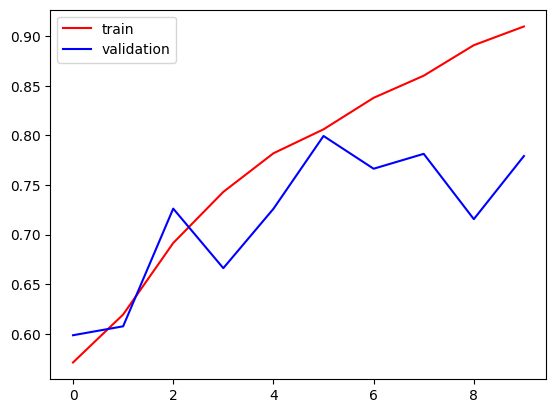

In [17]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

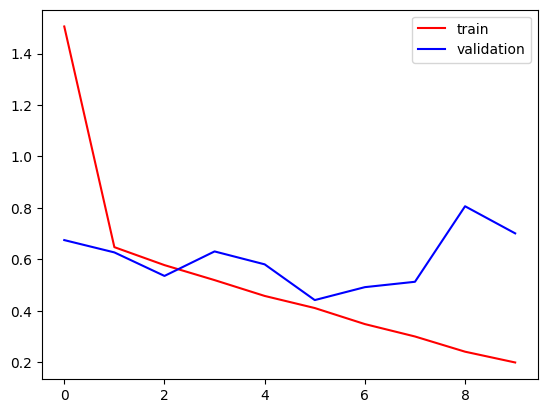

In [18]:
plt.plot(history.history['loss'],color ='red' ,label = 'train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### Recognizing CAT

In [19]:
import cv2 as cv 
from google.colab.patches import cv2_imshow

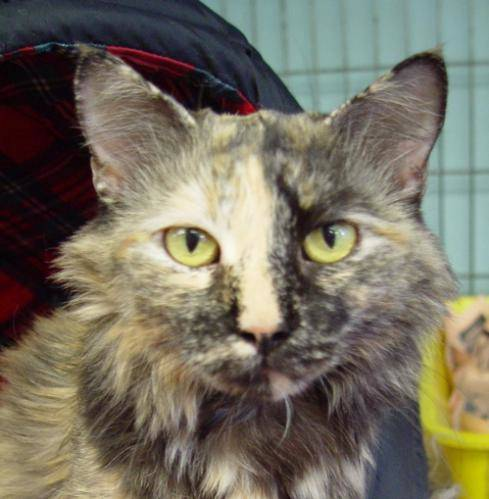

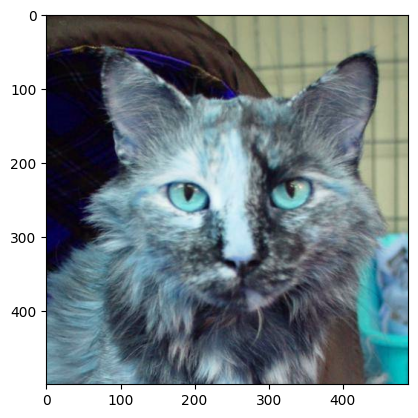

In [20]:
test_image = cv.imread('/content/test/cats/cat.10.jpg')
plt.imshow(test_image)
cv2_imshow(test_image)  # inversion is happen BGR

In [21]:
test_image.shape


(499, 489, 3)

In [22]:
tr_img = cv.resize(test_image, (256,256))
test_input = tr_img.reshape((1,256,256,3))

 0 -> cat
 
 1-> dog 

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 320ms/step


array([[0.]], dtype=float32)

Here it give 0 means it recognised the image is Cat.

### Recognizing Dog

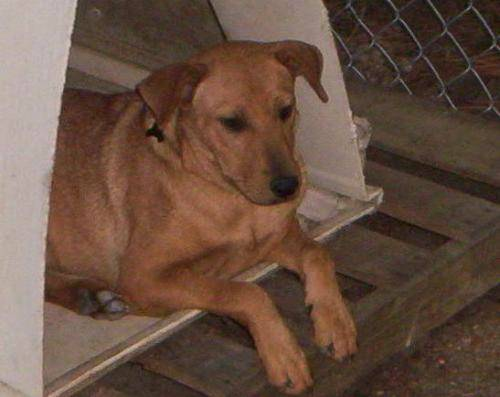

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

In [26]:
dog_image = cv.imread('/content/test/dogs/dog.100.jpg')
# plt.imshow(dog_image)
cv2_imshow(dog_image)  # inversion is happen BGR
dog_image.shape
dr_img = cv.resize(dog_image, (256,256))
test_input = dr_img.reshape((1,256,256,3))
model.predict(test_input)

Here its predict 1 means means dog. This is correct.

Note: this classfication Neural Network in not perfect in some trail recognize wrong.